# Determining the Roots of Polynomials

### Goal

Implement an algorithm in `numpy` that allows to determine the roots of all the (possibly complex) roots of an arbitrary polynomial with real coefficients. 

To that end, you need to  

1. implement the Mueller algorithm
2. learn using a representation of the polynomials and dividing polynomials using this representation
3. iteratively factorising off roots found by the Mueller algorithm by means of polynomial division 


For the implementation you should use `numpy`-functionality, but **no** higher-level libraries such as *scipy*.  

You can also find further information on the Mueller algorithm in the pdf with some pages extracted from G. Opfer _Numerische Mathematik für Anfänger_, Vieweg 2001.

Please send your solution by mail to [Martin Melchior](mailto:martin.melchior@fhnw.ch).

## 1. Polynomials and their Roots

The [Fundamental Theorem of Algebra](https://de.wikipedia.org/wiki/Fundamentalsatz_der_Algebra) says that a polynomial of degree $n$ has exactly $n$ roots (where a given root can occur multiple times). 

### Decomposition into Linear Factors
This result allows to express any polynomial of degree $n$ as a product of $n$ linear factors, i.e.

$$p(x) = a\prod_{k=1}^n (x-x_k)$$

where $x_1,\dots,x_n$ denote the roots of the polynomial $p(x)$. In this list, a given root can occur multiple times (i.e. $x_k$ and $x_j$ can be identical) and some of the roots can be complex-valued.

Example: The polynomial $p(x) = x^3 + x^2 = x^2 \cdot (x+1)$ has a factorisation 

$$p(x) = x \cdot x \cdot (x+1) = (x-x_1)\cdot (x-x_2)\cdot (x-x_3) {\rm  \quad with \qquad} x_1=x_2=0, x_3=-1$$


Let $x_0$ be a root of an arbitrary polynomial $p(x)$.

We can always write down the following factorization: 

$$p(x) = (x-x_0)\cdot q(x) + r(x) $$

where 
* $q(x)$ is a polynomial with degree $deg(q)=deg(p)-1$ and 
* $r(x)$ is the remainder of the polynomial division which is of smaller degree than the divisor.

In our case, $deg(r)<1$ so that $r(x)$ is a constant $r_0$.  

Now, if $x_0$ is a root of $p(x)$ we can have:

$$0 = p(x_0) = (x_0-x_0)\cdot q(x_0) + r_0 = r_0 $$

Hence, we obtain $p(x)=(x-x_0)\cdot q(x)$.

We can do this factorization for all the roots so that any polynomial of degree $n$ factors into $n$ (possibly complex) linear factors. 


### Complex Roots
In general, the roots are complex. For polynomials with real cofficients, these occur in complex conjugate pairs, i.e. 

If $z$ is a complex root, then its conjugate $\overline{z}$ is also a root.

As an example, we examine the roots of the polynomial

$$p(x) = x^4 -1$$

The roots are given by $x_1=1, x_2=-1, x_3=+i, x_4=-i$ (note that $(\pm i)^4 = \left(i^2\right)^2 = (-1)^2 = 1$). The roots all lie on the intersections of the unit circle with the axis.

<img src="polarx4.png">

## 2. Implement Mueller Algorithm

The Mueller Algorithm tries to iteratively determine the root (zero) of a function  $f(x)$ by starting from given values $\{x_0, x_1, x_2\}$ . While Newton's algorithm uses  subsequent approximations in form of the tangent line, Mueller's algorithm uses parabolas. An advantage is that by solving for the roots of a parabola also complex solutions can be found. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

No further imports will be necessary.

In a single iteration step of the Mueller algorithm, 
* the parabola is fitted (by using the function `fit_parabola` in (a)) which is centered around the previous iteration value ($x_2$)
* the (at max two) roots of the parabola are computed (by using the 'quadratic formula')
* the root $r$ with the smaller absolute value is used a difference to the next iteration value ($x_3 = r-x_2$)

### Problem 1(a): Fit a parabola through three given points

Implement a function `fit_parabola` that fits a parabola through three given points of a function $f$ evaluated at $x$-values $x_0, x_1, x_2$. The parabola is parameterised by $p(x)=a(x-x_2)^2+b(x-x_2)+c$. The function should return the coefficients $a,b,c$.

In [2]:
def fit_parabola( f, x0, x1, x2 ):
    """
    Fits a parabola to the function f in the points (x0, x1, x2) and returns the 
    parameters (a,b,c) of the parabola.
    
    Arguments:
    f -- arbitrary Python function with one argument
    x0 -- data point x_0 (real or complex number)
    x1 -- data point x_1 (real or complex number)
    x2 -- data point x_2 (real or complex number)
    
    Returns:
    a, b, c -- parabola's parameters
    """
    
    # EXERCISE START

    y0=f(x0)
    y1=f(x1)
    y2=f(x2)
    
    y = (np.array([y0,y1,y2]))
    x = np.array([[((x0-x2)*(x0-x2)),(x0-x2),1],
                  [((x1-x2)*(x1-x2)),(x1-x2),1],
                  [0,0,1]])
    x = np.linalg.inv(x)
    
    
    sol = np.matmul(x,y)
    
    a = sol[0]
    b = sol[1]
    c = sol[2]
   
    # EXERCISE STOP
    
    return a, b, c


With the following cell you can test whether your implementation of the function is correct.

In [3]:
# Test function 
f = lambda x: x**4 - 1
x0,x1,x2 = 0.0,1.0,2.0
a,b,c = fit_parabola( f, x0,x1,x2 )

np.testing.assert_array_almost_equal(a, 7.0, decimal=9)
np.testing.assert_array_almost_equal(b, 22.0, decimal=9)
np.testing.assert_array_almost_equal(c, 15.0, decimal=9)


# If you choose f as a parabola you should obtain the coefficients of the parabola suitably centered at x2
f2 = lambda x: (x-2.0)**2+2*(x-2.0)-1
x0,x1,x2 = 0.0,1.0,2.0
a,b,c = fit_parabola( f2, x0,x1,x2 )

np.testing.assert_array_almost_equal(a, 1.0, decimal=9)
np.testing.assert_array_almost_equal(b, 2.0, decimal=9)
np.testing.assert_array_almost_equal(c, -1.0, decimal=9)


With the following plotting utility you can test visually whether the correct parameters are returned by your function.

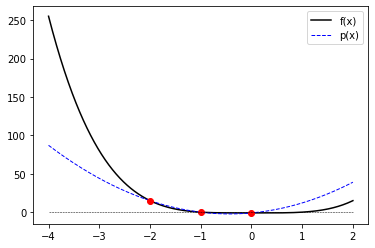

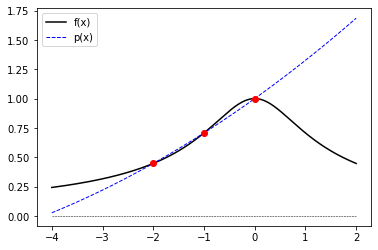

In [4]:
def plot_approximation( f, x0, x1, x2 ):
    x = np.linspace( x0-np.abs(x2-x0), x2+np.abs(x2-x0), 1000 )
    params = fit_parabola( f, x0, x1, x2 )    
    plt.plot( x, f(x), color="black", label="f(x)" )
    p = lambda x: params[0]*(x-x2)**2 + params[1]*(x-x2) + params[2]
    plt.plot( x, p(x), color="blue", linestyle="--", linewidth=1, label="p(x)" )
    plt.plot( [x0,x1,x2], [f(x0),f(x1),f(x2)], 'o', color="red" )
    plt.plot( x, x*0, color="black", linestyle="--", linewidth=0.5 )
    plt.legend()
    plt.show()
    
plot_approximation( f, -2, -1, 0 )
plot_approximation( lambda x: 1/(1+x**2)**(0.5), -2,-1,0)

The Parabola should pass through the three red points.

### Problem 1(b): Select Root of Parabola

Now select the root of the parabola in $x-x_2$ with the smaller absolute value which will give you the difference to the next iteration value.

In [5]:
def parabolaRoot(a, b, c, eps=1.0e-12):
    """
    Returns for a parabola with (possibly complex) canonical parameters (a,b,c) the roots ('zeros') 
    suited for the Mueller method.
    
    Arguments:
    a -- coefficient for the squared variable
    b -- linear coefficient
    c -- constant coefficient
    eps - numerical tolerance (absolute values smaller than `eps` are treated as zeros)
    
    Returns:
    r -- suitable root or None if no root can be found
    """
    
    # EXERCISE START
    r=None
    
    #TODO: what should be checked with eps?
    a = 0 if np.absolute(a)<eps else a
    b = 0 if np.absolute(b)<eps else b
    c = 0 if np.absolute(c)<eps else c
    
    if(a==0):
        if(b==0):
            if(c!=0):
                return r
            else:
                return 0
        else:
            return -c/b
    
    
    
    d = b**2-4*a*c
    
    #TODO: what should be checked with eps?
    d = 0 if np.absolute(d)<eps else d
    
    ##Could also detect complex case separately but i dont think its necessary
    if(d!=0):
        r = (((-b)+(np.sqrt(d+0j)))/(2*a))
        r_tmp = (((-b)-(np.sqrt(d+0j)))/(2*a))
        if(np.absolute(r) > np.absolute(r_tmp)):
            r=r_tmp
    else:
        r = (-b)/2*a
        
    #TODO: what should be checked with eps?
    r = 0 if np.absolute(r)<eps else r
    
    return r
    # EXERCISE STOP

#### Tests

In [6]:
np.testing.assert_almost_equal(parabolaRoot(2,3,1), -0.5, decimal=10)
np.testing.assert_almost_equal(parabolaRoot(0,2,1), -0.5, decimal=10)
np.testing.assert_equal(parabolaRoot(0,0,1) is None, True)

Be careful about corner cases - reflect about corner cases where a the standard procedure with the 'quadratic formula' ('midnight formula') may not be adequate. 

Note that the coefficients of the parabola might become zero or complex. Make sure that your implementation in python correctly handles possible imaginary parts - as described below.

#### Complex Numbers in Numpy

Numpy needs to be told explicitly to calculate with complex numbers. To give an example: By default, the expression `np.sqrt(-1)` returns `nan` (not a number). By specifying `np.sqrt(-1+0j)` numpy recognizes that complex numbers need to be considered and returns `1j`. Note that numpy uses as imaginary unit `j` instead of `i` - a default taken from electric engineering where `i` is reserved to denote electric current. 

Numpy can be forced to use complex numbers as follows (illustrated with the example of the square root):

```
> np.sqrt(-1+0j)
1j
> np.sqrt(np.complex(-1))
1j
```

Hence you need to make sure that a complex argument is passed to the square root.

### Problem (c): Iteration

Now combine (a) and (b) to the iterative Mueller algorithm for computing the root of a given function. Your implementation should take a function object $f$ and initial values $\{x_0,x_1,x_2\}$ and iteratively calculate a sequence of values until either a root is obtained within a given precision $\varepsilon$ or a maximum number of iterations $n_\text{max}$ is reached. The values from where a parabola is fitted in a given iteration step need to be tested for suitability and possibly modified such that a root (of the parabola) can be determined. 

In [7]:
from warnings import warn

N_INNER_LOOP = 10

def mueller( f, x0, x1, x2, nmax=100, eps=1e-8 ):
    """
    Finds a root of the function f with the Mueller method using the initial values x0, x1 and x2.
    Checks first whether one of the initial values already is a root.
    
    Arguments:
    f -- arbitrary Python function with one argument
    x0 -- initial point x0 (real or complex number)
    x1 -- initial point x1 (real or complex number)
    x2 -- initial point x2 (real or complex number)
    nmax -- maximum allowed number of iterations
    eps -- desired accuracy
    
    Returns:
    rootf -- the root: f(x) = 0
    x -- all iterations of x (for diagnostic purposes)
    """
    
    # EXERCISE START
    num_iter = 0
    
    #Return inits
    root = None
    history = [x0,x1,x2]
    
    #Check if iniial values are roots already
    if(f(x0) == 0):
        return x0, history
    if(f(x1) == 0):
        return x1, history
    if(f(x2) == 0):
        return x2, history
    
    #TODO: implement
    #start iterating
    while(num_iter<nmax and not(np.absolute(f(x2))<eps)):
        num_iter += 1
        
        a, b, c = fit_parabola(f, x0, x1, x2)
        root = parabolaRoot(a,b,c)
        history.append(root)
        x0 = x1
        x1 = x2
        x2 = root
        
        #print(root)
        #print(x0,x1,x2)
        
        
        
        
    return root, history
    # EXERCISE STOP

### Test your Implementation

Perform a series of tests with functions specified below.

#### TEST 1

Possible roots are : $\{-1,1,-i,i\}$ - I obtain them all with the different initial values and the default precision $1.0 e^{-8}$:

In [8]:
f = lambda x: x**4-1
root, history = mueller( f, 0, 1, 2 )
print("x, f(x): ", root,",", np.abs(f(root)))
root, history = mueller( f, 0, 1j, 2j )
print("x, f(x): ", root,",", np.abs(f(root)))
root, history = mueller( f, 0, 3, 5 )
print("x, f(x): ", root,",", np.abs(f(root)))
root, history = mueller( f, 0, 3j, 5j )
print("x, f(x): ", root,",", np.abs(f(root)))


x, f(x):  1 , 0
x, f(x):  1j , 0.0
x, f(x):  (nan+nanj) , nan
x, f(x):  (-0-0.8114889110704563j) , 0.5663589788720131


<ipython-input-5-5ec221c24d37>:42: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = (((-b)+(np.sqrt(d+0j)))/(2*a))
<ipython-input-5-5ec221c24d37>:43: RuntimeWarning: invalid value encountered in cdouble_scalars
  r_tmp = (((-b)-(np.sqrt(d+0j)))/(2*a))


By plotting the sequence of values $x$, we can inspect how the solution is reached for given starting values $x_0,x_1,x_2$.

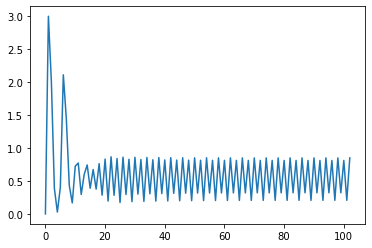

In [9]:
root, history = mueller( f, 0, 3, 2 )
plt.plot( np.abs(history) )

#### TEST 2

Possible roots are: $\{0.5\}$

In [10]:
f = lambda x: 2*x-1
root, history = mueller( f, 0, 1, 2 )
print("x, f(x): ", root,",", np.abs(f(root)))

LinAlgError: Singular matrix

#### TEST 3

Possible roots are: $\{\pm\sqrt{2}\pm\sqrt{2}i\}$ (four combinations of the $\pm$-signs)

In [ ]:
p = lambda x: x**4+16
root, history = mueller( p, 0, 1, 2 )
print(root, np.abs(p(root)))

#### TEST 4

Possible roots are $\{1\}$.

In [ ]:
p = lambda x: x**2-2*x+1
root, history = mueller( p, 0, 1, 2 )
print(root, np.abs(p(root)))

#### TEST 5

Examine the convergence of the Mueller algorithm for polynomials of the form $f(x) = x^m + c$ with $m \in [2,5,10,20,50]$ and $c \in [1,4,10,100,1000]$. 

Can you observe convergence for all the values of $m$ and $c$?

In [ ]:
x0, x1, x2 = 0,2,4
m_range = [2,5,10,20,50]
c_range = [1,4,10,100,1000]

steps = np.zeros( [len(c_range), len(m_range)] )
    
for i in range( len( c_range ) ):
    for j in range( len( m_range ) ):
        root, history = mueller( lambda x: x**m_range[j] + c_range[i], x0, x1, x2 )
        steps[i,j] = len(history)
    
steps

## 3. Polynomial Division

Polynomial division works similarly to long division. It allows to divide a given polynomial by another and to calculate the polynomial factor and the remainder:
$$
\frac{p(x)}{s(x)} = q(x) + \frac{r(x)}{s(x)}
$$
Goal of this exercise is to implement polynomial division based on a suitable representation of the polynomials $p$ (dividend) and $s$ (divisor).

We will represent the polynomials in form of the list of coefficients. 

For $p(x) = \sum_{k=0}^{n} \alpha_k x^k$ we use the representation 
$$p = [\alpha_0, \alpha_1, \dots, \alpha_{n-1}, \alpha_n]$$

Note that the coefficient with the largest power is put at the end of the list. 

**Examples:** 

$\begin{array}{llrcl}
p(x) = 4x^5 - x^4 + 2x^3 + x^2 - 1 &:&[\alpha_0, \alpha_1, \alpha_2, \dots, \alpha_5]&=&[-1,0,1,2,-1,4]\\
q(x) = x^2+1 &:&[\alpha_0, \alpha_1, \alpha_2] &=& [1,0,1]
\end{array}$

For the polynomial division you can use the numpy function `numpy.polydiv`.

In [ ]:
p = np.array([-1,0,1,2,-1,4]) # 4x^5-x^4+2x^3+x^2-1
q = np.array([1,0,1])         # x^2+1
s,r = np.polynomial.polynomial.polydiv( p, q )
print(s) # divisor   4x^3-x^2-2x+2
print(r) # remainder 2x-3

## 4. All Roots of a Polynomial

Now we are in the position to implement the function `poly_roots` that determines all roots of a given polynmials by starting with given initial values $x_0, x_1, x_2$.

In [ ]:
def poly_roots( p, x0, x1, x2, eps=1.0e-8):
    """
    Computes all roots of the polynomial with parameters p, given a set of initial points x0, x1, x2.
    Prints a warning in case a polynomial division results in a non-zero rest. 
    
    Arguments:
    p -- parameters of the polynomial p
    x0 -- initial point x0 (real or complex number)
    x1 -- initial point x1 (real or complex number)
    x2 -- initial point x2 (real or complex number)
    
    Returns:
    roots -- list of (complex) roots of the polynomial
    """
    # EXERCISE START

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    # EXERCISE STOP

### TEST your implementation

The following function allows to plot the roots in the complex plane:

In [ ]:
def polar_plot( roots ):
    for x in roots:
        plt.polar([0,np.angle(x)],[0,np.abs(x)],marker='o', label=str(np.round(x,8)) )
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2 )

#### TEST 1

$-x^4+1 :  \{1,-1,i,-i\}$

In [ ]:
f = np.array([1, 0, 0, 0, -1])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)

#### TEST 2

$x^3+x+2 : \{-1, 1/2\pm i\sqrt{7}/2\}$

In [ ]:
f = np.array([2, 1, 0, 1])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)

#### TEST 3

$x^4+x^2+2$

In [ ]:
f = np.array([2, 0, 1, 0, 1])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)

#### TEST 4

$p(x) = x^4 + x^3 + 3x^2 + 2x + 2 : \{\pm i\sqrt{2}, -1/2\pm i\sqrt{3}/2\}$


In [ ]:
# EXERCISE START
f = np.array([2, 2, 3, 1, 1])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)

#### TEST 5

$p_2(x) = 3x^6 + 5x^4 - 4x^2 - 3x + 5$

In [ ]:
f = np.array([5,-3,-4,0,5,0,3])
roots = poly_roots( f, -3, -2, -1 )
print(roots)
polar_plot(roots)